# Mean and standard deviation

**Problem 3a.** In this problem we look at the mean and the standard deviation from a more statistical point of view.
 * Generate $N=1\,000$ values $x_1,\ldots,x_n$ from Poisson($\lambda$) distribution for $\lambda=10$. You might want to use the function **poisson(lambda,shape)** from package **numpy.random**.
 * Plot a histogram of these values. What is the mean of Poisson($\lambda$)? What is the standard deviation? Are these values a good description of what you see in the histogram?
 * For $i \in \{1,\ldots,n\}$ compute $\bar{x}_i = \frac{x_1+\ldots+x_i}{i}$. Plot the values of $\bar{x}_i$.
 * On the same figure, plot a horizontal line corresponding to the expected value ($\lambda$) of all those averages.
 * Compute (analitically) the standard deviation $\sigma_i$ of the $i$-th average and plot lines $\lambda \pm \sigma_i$, again on the same figure.
 * Does the standard deviation accurately describe the *typical* deviations?

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy.random as rnd
import numpy as np

N = 1000
lam = 10
poiss_gen = rnd.poisson(lam, N)

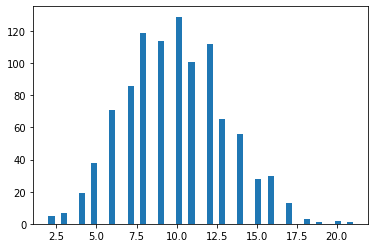

In [2]:
plt.figure(1)
plt.hist(poiss_gen, 50)
plt.show()

In [3]:
from statistics import mean, median, stdev
print(mean(poiss_gen))
print(stdev(poiss_gen))

9
3.0


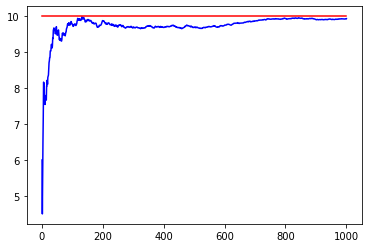

In [4]:
indx = (np.arange(N) + 1)
poiss_avgs = np.cumsum(poiss_gen) / indx
plt.figure(2)
plt.plot(indx, poiss_avgs, 'b-')
plt.plot(indx, np.zeros(N) + lam, 'r-')
plt.show()

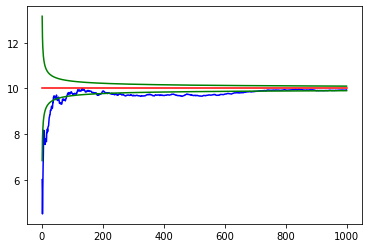

In [5]:
from math import sqrt
std_poiss_dev = (np.zeros(N) + sqrt(lam)) / np.sqrt(indx)
plt.figure(3)
plt.plot(indx, poiss_avgs, 'b-')
plt.plot(indx, np.zeros(N) + lam, 'r-')
plt.plot(indx, std_poiss_dev + lam, 'g-')
plt.plot(indx, -std_poiss_dev + lam, 'g-')
plt.show()

**Problem 3b.** In this task we consider a discrete distribution *without a mean* and verify whether we can still estimate the location of its peak by simply computing averages. Consider a discrete variable $X$ with the following distribution: $P(X=k) = \frac{1}{4|k|(|k|+1)}$ for $k \neq 0$ and $P(X=0) = \frac{1}{2}$. 
 * Argue that these formulas indeed describe a discrete distribution.
 * Show that $X$ does not have a mean.
 * Plot the function $f(k) = P(X=k)$ for $k \in [-10,10]$.
 * Write a function that samples from $X$'s distribution (imaginary bonus points if it is vectorized).
 * Generate $N=10\,000$ values $x_1,\ldots,x_n$ from the distribution.
 * For $i \in \{1,\ldots,n\}$ compute $\bar{x}_i = \frac{x_1+\ldots+x_i}{i}$. 
 * Plot the values of $\bar{x}_i$. Does it look like the series converges? If it is not clear, you can compute several independent
   $N$-means and plot a histogram, then increase $N$ significantly and see how it changes.
 * For $i \in \{1,\ldots,n\}$ compute $\hat{x}_i = \textrm{ median of }\{x_1,\ldots,x_i\}$. 
   You do not need to do it in a clever way (like in ASD lab).
 * Plot the values of $\hat{x}_i$. Does it look like the series converges? 
 * A more interesting situation would be the one where you a given a distribution like $X+c$ for unknown $c$, and 
   want to figure out what $c$ is, i.e. find the center of the distribution. Both methods above attempt to
   locate the center - which works better?

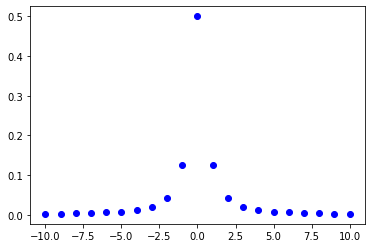

In [39]:
# can change the c value to some constant value and then see that 
# median is better find this value in the last part of this task
def f1(k, c = 0.0):
    if k == 0:
        return 0.5 + c
    else:
        return 1/(4 * abs(k) * (abs(k) + 1)) + c

    
def map_np_array(f, arr):
    return np.fromiter((f(xi) for xi in arr), np.double)
    
    
k_idx = np.arange(-10, 11, 1)
plt.figure(4)
plt.plot(k_idx, map_np_array(f1, k_idx), 'bo')
plt.show()

In [34]:
from random import random as rnd
from math import floor

N = 10000

def sample_by_symm(zero_prob, random_fun): 
    if rnd() <= zero_prob:
        return 0
    elif rnd() < 0.5:
        return random_fun()
    else:
        return -random_fun()
    
def random_1():
    return floor(1 / rnd())
    
def sampler(idx):
    return sample_by_symm(0.5, random_1)

d1_gen = map_np_array(sampler, np.zeros(N))

In [35]:
print('check -> : x < 0 has ' + str(len(d1_gen[d1_gen < 0.])))
print('check -> : x > 0 has ' + str(len(d1_gen[d1_gen > 0.])))
print('check -> : x = 0 has ' + str(len(d1_gen[d1_gen == 0.])))

check -> : x < 0 has 2558
check -> : x > 0 has 2523
check -> : x = 0 has 4919


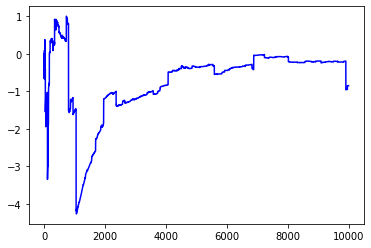

In [36]:
indx = (np.arange(N) + 1)
d1_avgs = np.cumsum(d1_gen) / indx
plt.figure(5)
plt.plot(indx, d1_avgs, 'b-')
plt.show()

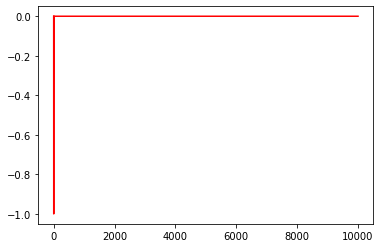

In [37]:
def median_for_d1(i):
    return np.median(d1_gen[0:i])
    
medians_d1 = map_np_array(median_for_d1, indx)
plt.figure(6)
plt.plot(indx, medians_d1, 'r-')
plt.show()

**Problem 3c.** We are now going to investigate an intermediate case - a variable with a finite mean, but no variance. Consider a discrete variable $Y$ with the following distribution: $P(Y=k) = \frac{1}{|k|(|k|+1)(|k|+2)}$ for $k \neq 0$ and $P(Y=0) = \frac{1}{2}$. 
 * Argue that these formulas indeed describe a discrete distribution.
 * Show that $EY=0$, but $Y$ has no variation (i.e. the defining series is not absolutely convergent).
 * Plot the function $f(k) = P(Y=k)$ for $k \in [-10,10]$.
 * Write a function that samples from $Y$'s distribution.
 * Generate $N=10\,000$ values $y_1,\ldots,y_n$ from the distribution.
 * For $i \in \{1,\ldots,n\}$ compute $\bar{y}_i = \frac{y_1+\ldots+y_i}{i}$. 
 * Plot the values of $\bar{y}_i$. Does it look like the series converges?
 * For $i \in \{1,\ldots,n\}$ compute $\hat{y}_i = \textrm{ median of }\{y_1,\ldots,y_i\}$.
 * Plot the values of $\hat{y}_i$.
 * Discuss the results obtained.

Let's see that $P(Y=k) = \frac{1}{|k|(|k|+1)(|k|+2)}$ for $k > 0$ we have 
$P(Y=k) = \frac{1}{k(k+1)(k+2)} = \frac{1}{2k(k+1)} - \frac{1}{2(k+1)(k+2)}$ and symmetric situation for $k < 0$
 * we see that $\sum_{k=1}^{+\infty}\frac{1}{2k(k+1)} - \frac{1}{2(k+1)(k+2)} = \frac{1}{4}$ because of telescoping sum
 so we can state that $\sum_{k=-\infty}^{+\infty}P(Y = k) = \frac{1}{4}+ \frac{1}{2}+ \frac{1}{4}=1$ so it is a discrete distribution
 * $E[Y]=\sum_{k} k\,P(Y=k) = 2\sum_{k=1}^{+ \infty}k\frac{1}{k(k+1)(k+2)} = 2\sum_{k=1}^{+ \infty}\frac{1}{(k+1)(k+2)} = 2\sum_{k=1}^{+ \infty}\left(\frac{1}{k+1} - \frac{1}{k+2}\right) = 2 \cdot \frac{1}{2} = 1$ also because of telescoping sum. For the variation we would like to write that $Var(Y)=\sigma^{2}(Y) = E[Y^{2}]-(E[Y])^{2}$ so we would have to find the $E[Y^{2}]$ which is by the definition the $E[Y^{2}] = \sum_{k}k^{2}P(Y=k) = 2 \sum_{k=1}^{+\infty}\frac{k^{2}}{k(k+1)(k+2)}=2 \sum_{k=1}^{+\infty}\frac{k}{(k+1)(k+2)}$ which is asymptotically the same as the sum $\sum_{k=1}^{+\infty}\frac{1}{k}$ which does NOT converge so we can state that $Y$ has no variation

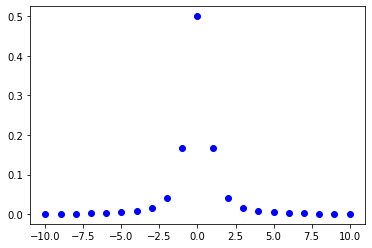

In [40]:
def f2(k, c = 0.0):
    if k == 0:
        return 0.5 + c
    else:
        return 1/(abs(k) * (abs(k) + 1) * (abs(k) + 2)) + c
    
k_idx = np.arange(-10, 11, 1)
plt.figure(7)
plt.plot(k_idx, map_np_array(f2, k_idx), 'bo')
plt.show()

 * if we want to write a function that samples from Y distribution we can see that for partial sums we have that $\sum_{k=1}^{n}\left( \frac{1}{2k(k+1)} - \frac{1}{2(k+1)(k+2)} \right) = \frac{1}{2}\left(\frac{1}{2}-\frac{1}{(n+1)(n+2)}\right) = \frac{1}{4}\left(1-\frac{2}{(n+1)(n+2)}\right)$ and using the same method as in the 3b exercise we would like to get random number $r\in[0,1]$ and translate it to the specified $n$. We can do it by comparing the next two partial sums (by thinking of them as of the prefix sums) and writing $1-\frac{2}{n(n+1)}\leq r <1-\frac{2}{(n+1)(n+2)}$ and after solving these inequalities we get that $\frac{1}{2}\left(\sqrt{1+\frac{8}{1-r}}-1\right) -1<n\leq \frac{1}{2}\left(\sqrt{1+\frac{8}{1-r}}-1\right)$ and by the definition of the floor and seeing that it doesn't matter if we get random $r$ or $1-r$ we can write that $n = \lfloor\frac{1}{2}\left(\sqrt{1+\frac{8}{
r}}-1\right)\rfloor$ and using this observation define the function in python

In [41]:
from math import ceil

N = 10000

def random_2():
    return floor((sqrt(1.0 + (8.0 / rnd())) - 1.0) / 2.0)
  
def sampler_2(idx):
    return sample_by_symm(0.5, random_2)

d2_gen = map_np_array(sampler_2, np.zeros(N))

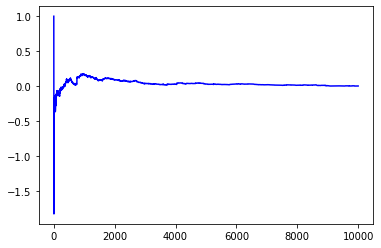

In [42]:
indx = (np.arange(N) + 1)
d2_avgs = np.cumsum(d2_gen) / indx
plt.figure(8)
plt.plot(indx, d2_avgs, 'b-')
plt.show()

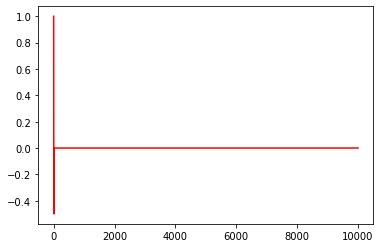

In [44]:
def median_for_d2(i):
    return np.median(d2_gen[0:i])
    
medians_d2 = map_np_array(median_for_d2, indx)
plt.figure(9)
plt.plot(indx, medians_d2, 'r-')
plt.show()